In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading
## Maize Data set!

In [2]:
df = pd.read_csv('/content/drive/MyDrive/crops_dataset/maize.csv')

In [3]:
df

,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date,State
0,Kurnool,Allagadda,Maize,Local,FAQ,1270.0,1400.0,1350.0,07-04-2015,Andhra Pradesh
1,Kurnool,Allagadda,Maize,Local,FAQ,1200.0,1350.0,1250.0,06-04-2015,Andhra Pradesh
2,Kurnool,Allagadda,Maize,Local,FAQ,1100.0,1350.0,1250.0,21-03-2015,Andhra Pradesh
3,Kurnool,Allagadda,Maize,Local,FAQ,1200.0,1400.0,1300.0,20-03-2015,Andhra Pradesh
4,Kurnool,Allagadda,Maize,Other,FAQ,950.0,1100.0,1000.0,11-12-2014,Andhra Pradesh
...,...,...,...,...,...,...,...,...,...,...
834273,Malda,Samsi,Maize,Deshi Red,FAQ,600.0,600.0,600.0,25-12-2008,West Bengal
834274,Malda,Samsi,Maize,Deshi Red,FAQ,600.0,600.0,600.0,18-12-2008,West Bengal
834275,Malda,Samsi,Maize,Deshi White,FAQ,550.0,550.0,550.0,27-11-2008,West Bengal
834276,Malda,Samsi,Maize,Deshi White,FAQ,525.0,575.0,550.0,20-11-2008,West Bengal


# Pre-processing

In [4]:
df.shape

(834278, 10)

In [5]:
rows = df.shape[0]
rows

834278

In [6]:
cols = df.shape[1]
cols

10

In [7]:
df.isna().any()

District Name                False
Market Name                  False
Commodity                    False
Variety                      False
Grade                        False
Min Price (Rs./Quintal)      False
Max Price (Rs./Quintal)      False
Modal Price (Rs./Quintal)    False
Price Date                   False
State                        False
dtype: bool

## Dealing with Null Values!

In [8]:
# Number of Null values in the entire dataframe
df.isna().sum().sum()

0

In [9]:
## Checking number of null values in all the columns!

column_names = list(df.columns)
for i in range(0, len(column_names)):
  print(f"Column No: {i+1} = {column_names[i]} has {df[column_names[i]].isna().sum()} Null values!")

Column No: 1 = District Name has 0 Null values!
Column No: 2 = Market Name has 0 Null values!
Column No: 3 = Commodity has 0 Null values!
Column No: 4 = Variety has 0 Null values!
Column No: 5 = Grade has 0 Null values!
Column No: 6 = Min Price (Rs./Quintal) has 0 Null values!
Column No: 7 = Max Price (Rs./Quintal) has 0 Null values!
Column No: 8 = Modal Price (Rs./Quintal) has 0 Null values!
Column No: 9 = Price Date has 0 Null values!
Column No: 10 = State has 0 Null values!


In [10]:
# No of unique values in all the columns

for i in range(0, len(column_names)):
  print(f'The column {column_names[i]} has {df[column_names[i]].nunique()} unique values!')

The column District Name has 356 unique values!
The column Market Name has 1334 unique values!
The column Commodity has 1 unique values!
The column Variety has 34 unique values!
The column Grade has 4 unique values!
The column Min Price (Rs./Quintal) has 2679 unique values!
The column Max Price (Rs./Quintal) has 2981 unique values!
The column Modal Price (Rs./Quintal) has 2903 unique values!
The column Price Date has 5113 unique values!
The column State has 28 unique values!


In [11]:
df.columns

Index(['District Name', 'Market Name', 'Commodity', 'Variety', 'Grade',
       'Min Price (Rs./Quintal)', 'Max Price (Rs./Quintal)',
       'Modal Price (Rs./Quintal)', 'Price Date', 'State'],
      dtype='object')

In [12]:
import pandas as pd

# Assuming df is your DataFrame
df.columns = df.columns.str.replace(' ', '_').str.lower()

# Alternatively, you can use the following code to replace spaces with underscores and convert to lowercase
# df.columns = [col.lower().replace(' ', '_') for col in df.columns]

# Now, the column names will be in lowercase and with underscores instead of spaces
print(df.columns)


Index(['district_name', 'market_name', 'commodity', 'variety', 'grade',
       'min_price_(rs./quintal)', 'max_price_(rs./quintal)',
       'modal_price_(rs./quintal)', 'price_date', 'state'],
      dtype='object')


In [13]:
df.head(5)

,district_name,market_name,commodity,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date,state
0,Kurnool,Allagadda,Maize,Local,FAQ,1270.0,1400.0,1350.0,07-04-2015,Andhra Pradesh
1,Kurnool,Allagadda,Maize,Local,FAQ,1200.0,1350.0,1250.0,06-04-2015,Andhra Pradesh
2,Kurnool,Allagadda,Maize,Local,FAQ,1100.0,1350.0,1250.0,21-03-2015,Andhra Pradesh
3,Kurnool,Allagadda,Maize,Local,FAQ,1200.0,1400.0,1300.0,20-03-2015,Andhra Pradesh
4,Kurnool,Allagadda,Maize,Other,FAQ,950.0,1100.0,1000.0,11-12-2014,Andhra Pradesh


In [14]:
df['month'] = df['price_date'].str[3:5].astype(int)
df['year'] = df['price_date'].str[6:].astype(int)


In [15]:
df.head(3)

,district_name,market_name,commodity,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date,state,month,year
0,Kurnool,Allagadda,Maize,Local,FAQ,1270.0,1400.0,1350.0,07-04-2015,Andhra Pradesh,4,2015
1,Kurnool,Allagadda,Maize,Local,FAQ,1200.0,1350.0,1250.0,06-04-2015,Andhra Pradesh,4,2015
2,Kurnool,Allagadda,Maize,Local,FAQ,1100.0,1350.0,1250.0,21-03-2015,Andhra Pradesh,3,2015


In [16]:
df['price_date'].dtype


dtype('O')

In [17]:
# Convert 'price_date' to timestamp
df['price_date'] = pd.to_datetime(df['price_date'], format='%d-%m-%Y')

# Convert 'month' and 'year' to int
df['month'] = df['month'].astype(int)
df['year'] = df['year'].astype(int)

# Display the updated DataFrame
print(df.dtypes)

district_name                        object
market_name                          object
commodity                            object
variety                              object
grade                                object
min_price_(rs./quintal)             float64
max_price_(rs./quintal)             float64
modal_price_(rs./quintal)           float64
price_date                   datetime64[ns]
state                                object
month                                 int64
year                                  int64
dtype: object


In [18]:
df_copy = df

# Encoding Columns

## district Name

In [19]:
df['district_name'].nunique()

356

In [20]:
value_counts = df['district_name'].value_counts()

In [21]:
value_counts

Karimnagar          21176
Sabarkantha         20946
Chittorgarh         18069
Nashik              17995
Mahbubnagar         14668
                    ...  
Dhalai                  1
Unokoti                 1
Garhwal (Pauri)         1
Champawat               1
Kachchh                 1
Name: district_name, Length: 356, dtype: int64

In [22]:
district_name_frequency = df['district_name'].value_counts(normalize=False)

# Create a new column with encoded values
df['district_name_encoded'] = df['district_name'].map(district_name_frequency)

In [23]:
df.head(5)

,district_name,market_name,commodity,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date,state,month,year,district_name_encoded
0,Kurnool,Allagadda,Maize,Local,FAQ,1270.0,1400.0,1350.0,2015-04-07,Andhra Pradesh,4,2015,12812
1,Kurnool,Allagadda,Maize,Local,FAQ,1200.0,1350.0,1250.0,2015-04-06,Andhra Pradesh,4,2015,12812
2,Kurnool,Allagadda,Maize,Local,FAQ,1100.0,1350.0,1250.0,2015-03-21,Andhra Pradesh,3,2015,12812
3,Kurnool,Allagadda,Maize,Local,FAQ,1200.0,1400.0,1300.0,2015-03-20,Andhra Pradesh,3,2015,12812
4,Kurnool,Allagadda,Maize,Other,FAQ,950.0,1100.0,1000.0,2014-12-11,Andhra Pradesh,12,2014,12812


## market name

In [24]:
df['market_name'].nunique()

1334

In [25]:
value_counts = df['market_name'].value_counts()

In [26]:
value_counts

Vadodara       7811
Dahod          7593
Fatehnagar     6880
Rajasamand     6057
Bhilwara       4589
               ... 
Dhuri             1
Kotadwara         1
Armori            1
Alwal,RBZ         1
Tellarevu         1
Name: market_name, Length: 1334, dtype: int64

In [27]:
market_name_frequency = df['market_name'].value_counts(normalize=False)

# Create a new column with encoded values
df['market_name_encoded'] = df['market_name'].map(market_name_frequency)

In [28]:
df.head(5)

,district_name,market_name,commodity,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date,state,month,year,district_name_encoded,market_name_encoded
0,Kurnool,Allagadda,Maize,Local,FAQ,1270.0,1400.0,1350.0,2015-04-07,Andhra Pradesh,4,2015,12812,8
1,Kurnool,Allagadda,Maize,Local,FAQ,1200.0,1350.0,1250.0,2015-04-06,Andhra Pradesh,4,2015,12812,8
2,Kurnool,Allagadda,Maize,Local,FAQ,1100.0,1350.0,1250.0,2015-03-21,Andhra Pradesh,3,2015,12812,8
3,Kurnool,Allagadda,Maize,Local,FAQ,1200.0,1400.0,1300.0,2015-03-20,Andhra Pradesh,3,2015,12812,8
4,Kurnool,Allagadda,Maize,Other,FAQ,950.0,1100.0,1000.0,2014-12-11,Andhra Pradesh,12,2014,12812,8


In [29]:
df = df.drop('commodity',axis=1)

## variety

In [30]:
df['variety'].nunique()

34

In [31]:
value_counts = df['variety'].value_counts()

In [32]:
variety_frequency = df['variety'].value_counts(normalize=False)

# Create a new column with encoded values
df['variety_encoded'] = df['variety'].map(variety_frequency)

In [33]:
df.head(5)

,district_name,market_name,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date,state,month,year,district_name_encoded,market_name_encoded,variety_encoded
0,Kurnool,Allagadda,Local,FAQ,1270.0,1400.0,1350.0,2015-04-07,Andhra Pradesh,4,2015,12812,8,99238
1,Kurnool,Allagadda,Local,FAQ,1200.0,1350.0,1250.0,2015-04-06,Andhra Pradesh,4,2015,12812,8,99238
2,Kurnool,Allagadda,Local,FAQ,1100.0,1350.0,1250.0,2015-03-21,Andhra Pradesh,3,2015,12812,8,99238
3,Kurnool,Allagadda,Local,FAQ,1200.0,1400.0,1300.0,2015-03-20,Andhra Pradesh,3,2015,12812,8,99238
4,Kurnool,Allagadda,Other,FAQ,950.0,1100.0,1000.0,2014-12-11,Andhra Pradesh,12,2014,12812,8,351901


## grade

In [34]:
df['grade'].unique()

array(['FAQ ', 'Medium ', 'Large ', 'Small '], dtype=object)

In [35]:
value_counts = df['grade'].value_counts()
value_counts

FAQ        752320
Medium      75800
Large        4874
Small        1284
Name: grade, dtype: int64

In [36]:
grade_frequency = df['grade'].value_counts(normalize=False)

# Create a new column with encoded values
df['grade_encoded'] = df['grade'].map(grade_frequency)

In [37]:
df.head(5)

,district_name,market_name,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date,state,month,year,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded
0,Kurnool,Allagadda,Local,FAQ,1270.0,1400.0,1350.0,2015-04-07,Andhra Pradesh,4,2015,12812,8,99238,752320
1,Kurnool,Allagadda,Local,FAQ,1200.0,1350.0,1250.0,2015-04-06,Andhra Pradesh,4,2015,12812,8,99238,752320
2,Kurnool,Allagadda,Local,FAQ,1100.0,1350.0,1250.0,2015-03-21,Andhra Pradesh,3,2015,12812,8,99238,752320
3,Kurnool,Allagadda,Local,FAQ,1200.0,1400.0,1300.0,2015-03-20,Andhra Pradesh,3,2015,12812,8,99238,752320
4,Kurnool,Allagadda,Other,FAQ,950.0,1100.0,1000.0,2014-12-11,Andhra Pradesh,12,2014,12812,8,351901,752320


## state

In [38]:
df['state'].unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chandigarh', 'NCT of Delhi', 'Gujarat', 'Goa', 'Himachal Pradesh',
       'Haryana', 'Jammu and Kashmir', 'Jharkhand', 'Kerala', 'Meghalaya',
       'Maharashtra', 'Manipur', 'Madhya Pradesh', 'Nagaland', 'Odisha',
       'Punjab', 'Pondicherry', 'Rajasthan', 'Telangana', 'Tamil Nadu',
       'Tripura', 'Uttrakhand', 'Uttar Pradesh', 'West Bengal'],
      dtype=object)

In [39]:
value_counts = df['state'].value_counts()
value_counts

Madhya Pradesh       165668
Uttar Pradesh        119722
Maharashtra          116265
Rajasthan             91596
Telangana             86507
Gujarat               82675
Tamil Nadu            67877
Andhra Pradesh        54866
Jharkhand             14050
Odisha                 9894
Punjab                 9296
Haryana                3637
Assam                  2706
Bihar                  2596
Manipur                2056
Uttrakhand             1948
West Bengal            1461
NCT of Delhi           1021
Nagaland                170
Pondicherry             129
Goa                      49
Himachal Pradesh         37
Meghalaya                21
Tripura                   9
Jammu and Kashmir         8
Kerala                    7
Chandigarh                4
Arunachal Pradesh         3
Name: state, dtype: int64

In [40]:
state_frequency = df['state'].value_counts(normalize=False)

# Create a new column with encoded values
df['state_encoded'] = df['state'].map(state_frequency)

In [41]:
df.head(5)

,district_name,market_name,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date,state,month,year,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded,state_encoded
0,Kurnool,Allagadda,Local,FAQ,1270.0,1400.0,1350.0,2015-04-07,Andhra Pradesh,4,2015,12812,8,99238,752320,54866
1,Kurnool,Allagadda,Local,FAQ,1200.0,1350.0,1250.0,2015-04-06,Andhra Pradesh,4,2015,12812,8,99238,752320,54866
2,Kurnool,Allagadda,Local,FAQ,1100.0,1350.0,1250.0,2015-03-21,Andhra Pradesh,3,2015,12812,8,99238,752320,54866
3,Kurnool,Allagadda,Local,FAQ,1200.0,1400.0,1300.0,2015-03-20,Andhra Pradesh,3,2015,12812,8,99238,752320,54866
4,Kurnool,Allagadda,Other,FAQ,950.0,1100.0,1000.0,2014-12-11,Andhra Pradesh,12,2014,12812,8,351901,752320,54866


# Taking only the Encoded columns

In [42]:
df_encoded = df[['district_name_encoded', 'market_name_encoded', 'variety_encoded', 'grade_encoded', 'state_encoded', 'month', 'year', 'price_date', 'min_price_(rs./quintal)', 'max_price_(rs./quintal)', 'modal_price_(rs./quintal)']]


# Encoded Dataset

In [43]:
df_encoded.head(8)

,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded,state_encoded,month,year,price_date,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal)
0,12812,8,99238,752320,54866,4,2015,2015-04-07,1270.0,1400.0,1350.0
1,12812,8,99238,752320,54866,4,2015,2015-04-06,1200.0,1350.0,1250.0
2,12812,8,99238,752320,54866,3,2015,2015-03-21,1100.0,1350.0,1250.0
3,12812,8,99238,752320,54866,3,2015,2015-03-20,1200.0,1400.0,1300.0
4,12812,8,351901,752320,54866,12,2014,2014-12-11,950.0,1100.0,1000.0
5,12812,8,25165,752320,54866,4,2009,2009-04-05,900.0,1100.0,1050.0
6,12812,8,25165,752320,54866,4,2009,2009-04-04,1000.0,1200.0,1050.0
7,12812,8,25165,752320,54866,8,2008,2008-08-11,760.0,1050.0,950.0


# Heat Map

<ipython-input-44-f636cb7d937b>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)


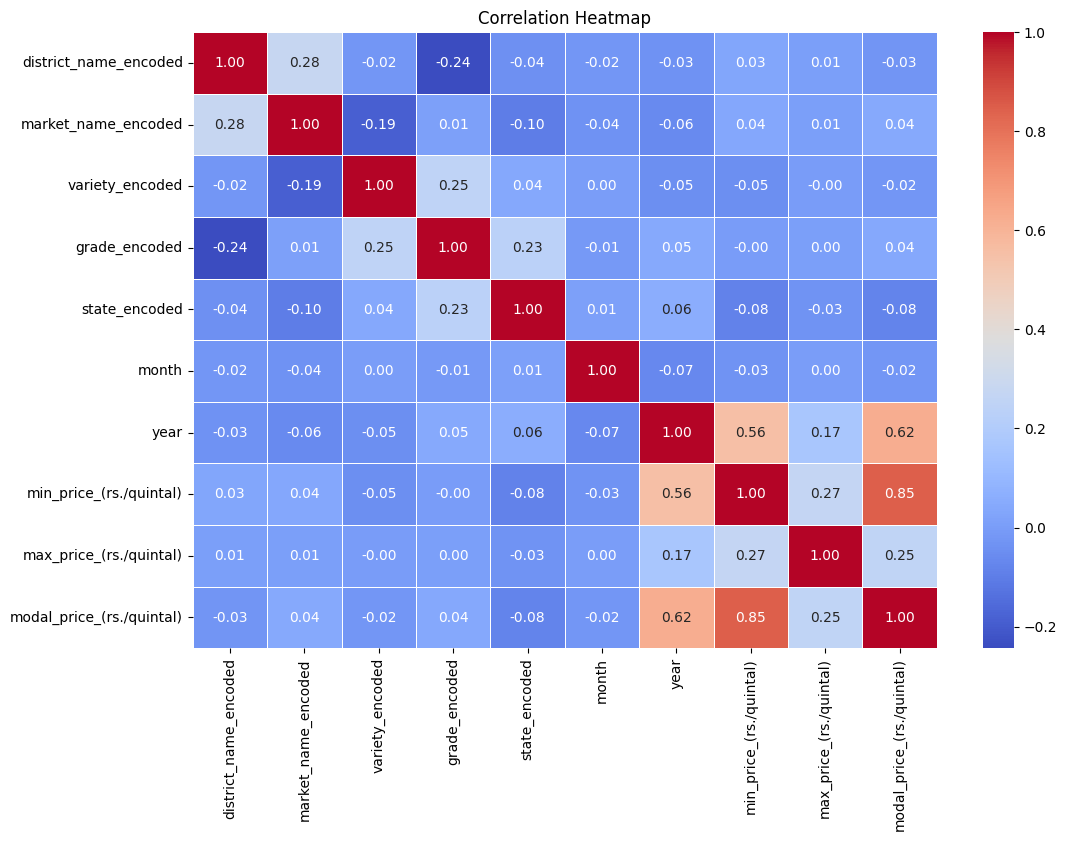

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_encoded is your DataFrame
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Models and Evaluation

In [45]:
# Evaluation Metrics

def Emetrics(y_test,y_pred):
  from sklearn import metrics

  # Print result of MAE
  print(f"Mean Absoulute error is : {metrics.mean_absolute_error(y_test,y_pred)}")

  # Print result of RMSE
  print(f"Root Mean Square error is: {np.sqrt(metrics.mean_squared_error(y_test,y_pred))}")

  # Print result of R2
  print(f"R2 score is: {metrics.r2_score(y_test,y_pred)}")

In [46]:
df_encoded.head(5)

,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded,state_encoded,month,year,price_date,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal)
0,12812,8,99238,752320,54866,4,2015,2015-04-07,1270.0,1400.0,1350.0
1,12812,8,99238,752320,54866,4,2015,2015-04-06,1200.0,1350.0,1250.0
2,12812,8,99238,752320,54866,3,2015,2015-03-21,1100.0,1350.0,1250.0
3,12812,8,99238,752320,54866,3,2015,2015-03-20,1200.0,1400.0,1300.0
4,12812,8,351901,752320,54866,12,2014,2014-12-11,950.0,1100.0,1000.0


# Outlier Removing rows

In [47]:
import pandas as pd
from scipy.stats import zscore

# Assuming df_encoded is your DataFrame
# Replace 'df_encoded' with your actual DataFrame name

# Function to identify outliers using Z-score
def identify_outliers_zscore(df, threshold=3):
    z_scores = zscore(df.select_dtypes(include=['float64', 'int64']))
    outliers = (abs(z_scores) > threshold).any(axis=1)
    return outliers

# Identify outliers
outliers = identify_outliers_zscore(df_encoded)

# Remove rows with outliers
df_cleaned = df_encoded[~outliers]



In [48]:
df_encoded = df_cleaned

## Standardizing values (min-max scalar)

In [49]:
df_encoded

,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded,state_encoded,month,year,price_date,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal)
0,12812,8,99238,752320,54866,4,2015,2015-04-07,1270.0,1400.0,1350.0
1,12812,8,99238,752320,54866,4,2015,2015-04-06,1200.0,1350.0,1250.0
2,12812,8,99238,752320,54866,3,2015,2015-03-21,1100.0,1350.0,1250.0
3,12812,8,99238,752320,54866,3,2015,2015-03-20,1200.0,1400.0,1300.0
4,12812,8,351901,752320,54866,12,2014,2014-12-11,950.0,1100.0,1000.0
...,...,...,...,...,...,...,...,...,...,...,...
834273,1037,619,65062,752320,1461,12,2008,2008-12-25,600.0,600.0,600.0
834274,1037,619,65062,752320,1461,12,2008,2008-12-18,600.0,600.0,600.0
834275,1037,619,62040,752320,1461,11,2008,2008-11-27,550.0,550.0,550.0
834276,1037,619,62040,752320,1461,11,2008,2008-11-20,525.0,575.0,550.0


In [50]:
from sklearn.preprocessing import MinMaxScaler

# Assuming df_encoded is your DataFrame
# Replace 'df_encoded' with your actual DataFrame name

# Columns to be scaled
columns_to_scale = ['district_name_encoded', 'market_name_encoded', 'variety_encoded', 'grade_encoded', 'state_encoded']

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
df_encoded[columns_to_scale] = min_max_scaler.fit_transform(df_encoded[columns_to_scale])


In [51]:
df_encoded.head(5)

,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded,state_encoded,month,year,price_date,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal)
0,0.605006,0.001526,0.282003,0.0,0.331168,4,2015,2015-04-07,1270.0,1400.0,1350.0
1,0.605006,0.001526,0.282003,0.0,0.331168,4,2015,2015-04-06,1200.0,1350.0,1250.0
2,0.605006,0.001526,0.282003,0.0,0.331168,3,2015,2015-03-21,1100.0,1350.0,1250.0
3,0.605006,0.001526,0.282003,0.0,0.331168,3,2015,2015-03-20,1200.0,1400.0,1300.0
4,0.605006,0.001526,1.000000,0.0,0.331168,12,2014,2014-12-11,950.0,1100.0,1000.0


## Forward Stepwise Selection

In [52]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def forward_stepwise_selection(X, y):
    # Initialize an empty set of features
    selected_features = []

    # Initialize a linear regression model
    model = LinearRegression()

    # Loop until all features have been added to the model
    while len(selected_features) < X.shape[1]:

        # Initialize variables to keep track of best feature and score
        best_feature = None
        best_score = -np.inf

        # Loop over all remaining features
        for feature in X.columns:
            if feature not in selected_features:
                # Fit a model with the current set of features plus the new feature
                current_features = selected_features + [feature]
                X_current = X[current_features]
                model.fit(X_current, y)

                # Calculate the score for the new model
                y_pred = model.predict(X_current)
                score = r2_score(y, y_pred)

                # Keep track of the best feature and score
                if score > best_score:
                    best_feature = feature
                    best_score = score

        # Add the best feature to the selected features and print the result
        selected_features.append(best_feature)
        print(f'Selected feature: {best_feature}, Score: {best_score:.4f}')

    return selected_features


In [53]:
X = df_encoded.loc[:, ['district_name_encoded',	'market_name_encoded',	'variety_encoded',	'grade_encoded',	'state_encoded',	'month',	'year']]
y = df_encoded.loc[:, ['min_price_(rs./quintal)',	'max_price_(rs./quintal)',	'modal_price_(rs./quintal)']]

In [54]:
print(forward_stepwise_selection(X, y))

Selected feature: year, Score: 0.4629
Selected feature: state_encoded, Score: 0.4791
Selected feature: market_name_encoded, Score: 0.4832
Selected feature: district_name_encoded, Score: 0.4851
Selected feature: month, Score: 0.4858
Selected feature: variety_encoded, Score: 0.4864
Selected feature: grade_encoded, Score: 0.4864
['year', 'state_encoded', 'market_name_encoded', 'district_name_encoded', 'month', 'variety_encoded', 'grade_encoded']


### All the features are closely important

## Linear Regression

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .4, random_state = 42)

In [57]:
from sklearn.linear_model import LinearRegression
lnregressor = LinearRegression()
lnregressor.fit(X_train,y_train)

LinearRegression()

In [58]:
y_pred = lnregressor.predict(X_test)
y_pred

array([[1253.19966288, 1360.24125884, 1358.44229561],
       [ 656.49483561,  679.5068464 ,  740.55530078],
       [ 925.32569933,  999.1605994 , 1022.26775062],
       ...,
       [1292.01977396, 1380.43140613, 1366.23764246],
       [1583.45991132, 1694.59641716, 1679.32513582],
       [1158.77500228, 1280.28686495, 1313.99528287]])

In [59]:
# Evaluation metrics for Linear Regression
Emetrics(y_test,y_pred)

Mean Absoulute error is : 192.5625417587512
Root Mean Square error is: 282.64213889296747
R2 score is: 0.48693417916685994


## Decision Tree Regression

In [60]:
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the model using the training sets
dt_regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = dt_regressor.predict(X_test)

In [61]:
# Evaluation metrics for Linear Regression
Emetrics(y_test,y_pred)

Mean Absoulute error is : 50.213519565793625
Root Mean Square error is: 100.79382138046304
R2 score is: 0.9346005591211931


## Random Forest Regression

In [62]:
from sklearn.ensemble import RandomForestRegressor

mrf_regressor = RandomForestRegressor(
    n_estimators=200,  # Reduced number of trees
    max_depth=30,  # Reduced maximum depth
    random_state=42,
    bootstrap=True,
    warm_start=True,  # Enable incremental training
    n_jobs=-1  # Utilize all CPU cores
)

# Train the model
mrf_regressor.fit(X_train, y_train)

# Make predictions
y_pred = mrf_regressor.predict(X_test)

In [63]:
Emetrics(y_test,y_pred)

Mean Absoulute error is : 49.69333570452767
Root Mean Square error is: 97.51956566906074
R2 score is: 0.9387956565784497


## XgBoost Regression

In [64]:
from xgboost import XGBRegressor
# Create the XGBoost regression model
xg_regressor = XGBRegressor(n_estimators=250, learning_rate=0.37,random_state=42)

# Train the model
xg_regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = xg_regressor.predict(X_test)

# Evaluate the model's performance
Emetrics(y_test,y_pred)

Mean Absoulute error is : 74.59966396242909
Root Mean Square error is: 118.8469981852593
R2 score is: 0.9091898276599376


## KNN Regression

In [65]:
from sklearn.neighbors import KNeighborsRegressor

# Create the KNN regression model
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Train the model
knn_regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn_regressor.predict(X_test)


# Evaluate the model's performance
Emetrics(y_test,y_pred)

Mean Absoulute error is : 57.36661310341526
Root Mean Square error is: 114.24722714965382
R2 score is: 0.9162624434814529


# Datasets of Maize

## Main

In [66]:
df

,district_name,market_name,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date,state,month,year,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded,state_encoded
0,Kurnool,Allagadda,Local,FAQ,1270.0,1400.0,1350.0,2015-04-07,Andhra Pradesh,4,2015,12812,8,99238,752320,54866
1,Kurnool,Allagadda,Local,FAQ,1200.0,1350.0,1250.0,2015-04-06,Andhra Pradesh,4,2015,12812,8,99238,752320,54866
2,Kurnool,Allagadda,Local,FAQ,1100.0,1350.0,1250.0,2015-03-21,Andhra Pradesh,3,2015,12812,8,99238,752320,54866
3,Kurnool,Allagadda,Local,FAQ,1200.0,1400.0,1300.0,2015-03-20,Andhra Pradesh,3,2015,12812,8,99238,752320,54866
4,Kurnool,Allagadda,Other,FAQ,950.0,1100.0,1000.0,2014-12-11,Andhra Pradesh,12,2014,12812,8,351901,752320,54866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834273,Malda,Samsi,Deshi Red,FAQ,600.0,600.0,600.0,2008-12-25,West Bengal,12,2008,1037,619,65062,752320,1461
834274,Malda,Samsi,Deshi Red,FAQ,600.0,600.0,600.0,2008-12-18,West Bengal,12,2008,1037,619,65062,752320,1461
834275,Malda,Samsi,Deshi White,FAQ,550.0,550.0,550.0,2008-11-27,West Bengal,11,2008,1037,619,62040,752320,1461
834276,Malda,Samsi,Deshi White,FAQ,525.0,575.0,550.0,2008-11-20,West Bengal,11,2008,1037,619,62040,752320,1461


### Saving the dataframe of maize

> Indented block



In [67]:
df.to_csv('maizedf.csv')

## Encoded

In [68]:
df_encoded

,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded,state_encoded,month,year,price_date,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal)
0,0.605006,0.001526,0.282003,0.0,0.331168,4,2015,2015-04-07,1270.0,1400.0,1350.0
1,0.605006,0.001526,0.282003,0.0,0.331168,4,2015,2015-04-06,1200.0,1350.0,1250.0
2,0.605006,0.001526,0.282003,0.0,0.331168,3,2015,2015-03-21,1100.0,1350.0,1250.0
3,0.605006,0.001526,0.282003,0.0,0.331168,3,2015,2015-03-20,1200.0,1400.0,1300.0
4,0.605006,0.001526,1.000000,0.0,0.331168,12,2014,2014-12-11,950.0,1100.0,1000.0
...,...,...,...,...,...,...,...,...,...,...,...
834273,0.048926,0.134699,0.184885,0.0,0.008801,12,2008,2008-12-25,600.0,600.0,600.0
834274,0.048926,0.134699,0.184885,0.0,0.008801,12,2008,2008-12-18,600.0,600.0,600.0
834275,0.048926,0.134699,0.176297,0.0,0.008801,11,2008,2008-11-27,550.0,550.0,550.0
834276,0.048926,0.134699,0.176297,0.0,0.008801,11,2008,2008-11-20,525.0,575.0,550.0


### Saving the encoded dataframe of maize

In [69]:
df_encoded.to_csv('maizeencdf.csv')

# Saving the Best Model

In [70]:
import pickle

# Pickle the model
with open('mrf_regressor.pkl', 'wb') as f:
    pickle.dump(mrf_regressor, f)